# Project - Medical Costs (Regression)

For this project I explore a medical costs data set which can be found online and I attempt to find make a model which can accurately predict the cost. 

In [1]:
#Importing important packages for use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Taking in data from online and reading in the csv file
url ='https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
df =  pd.read_csv(url)

Looking at the info of the dataframe we see there is no missing data. There is also a mix of numeric and catagorical features

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Some stats for the numeric data columns. Note the std of the charges is around 12000. However 50% of the charges are between around 4700 and 16600. So the large standard deviation is likely down to outliers.

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
#Head of the dataframe
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


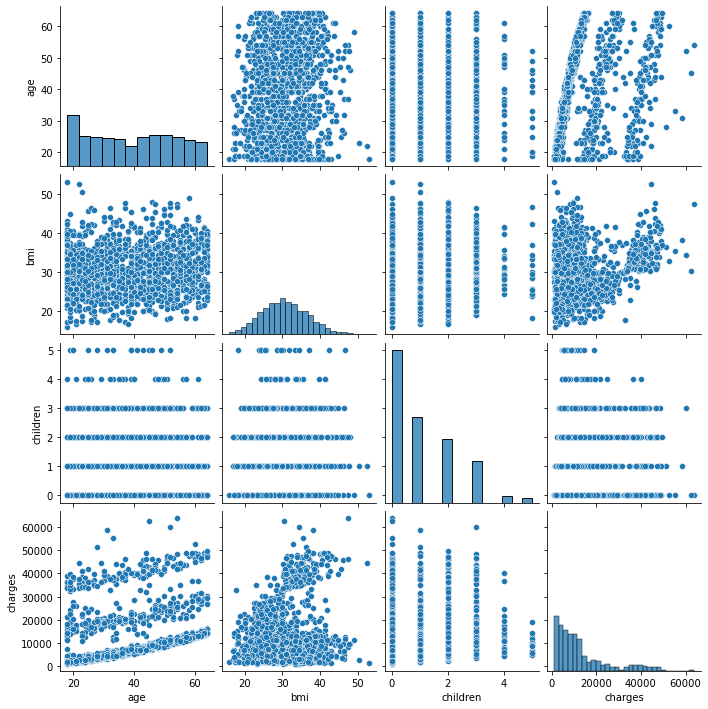

In [6]:
#Pairplot
sns.pairplot(df)

<AxesSubplot:xlabel='sex', ylabel='count'>

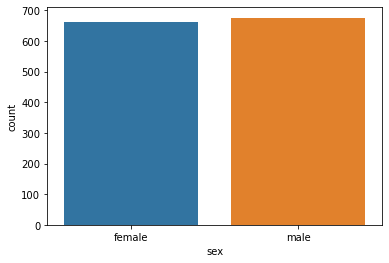

In [7]:
sns.countplot(x='sex',data=df)

<AxesSubplot:xlabel='smoker', ylabel='count'>

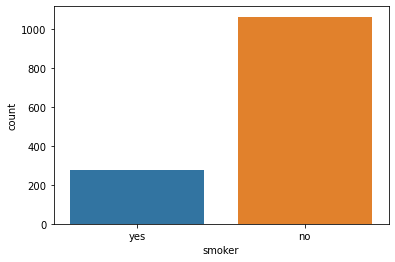

In [8]:
sns.countplot(x='smoker',data=df)

<AxesSubplot:xlabel='count', ylabel='region'>

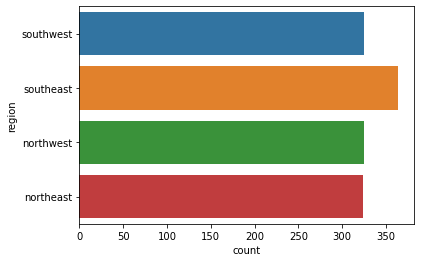

In [9]:
sns.countplot(y='region',data=df)

Here I am making a function which will change my sex catagory from male and female to 1 and 0, i.e., making the sex catagory numeric.

In [10]:
#Function for changing sex to a numeric column
def sex(sex):
    '''Return 1 for male and 0 for female.'''
    if sex == 'male':
        return 1
    else:
        return 0

In [11]:
#Making the new column
df['sex_zero_one']  = df['sex'].apply(sex)

In [12]:
#Droping the original sex column
df.drop('sex',axis=1,inplace=True)
df.head()

,age,bmi,children,smoker,region,charges,sex_zero_one
0,19,27.900,0,yes,southwest,16884.92400,0
1,18,33.770,1,no,southeast,1725.55230,1
2,28,33.000,3,no,southeast,4449.46200,1
3,33,22.705,0,no,northwest,21984.47061,1
4,32,28.880,0,no,northwest,3866.85520,1


Here I am making a function which will change my smoker catagory from yes and no to 1 and 0, i.e., making the smoker catagory numeric. Note both of these catagories could be changed to numeric using map and a dictionary.

In [13]:
#Making a function to chnage the smoker column to a numeric variable
def smoker(smoker):
    '''Return 1 for a smoker 'yes' and 0 for a non-smoker 'no'.'''
    if smoker == 'yes':
        return 1
    if smoker == 'no':
        return 0

In [14]:
#Making the new column for smoker or non smoker
df['smoker_zero_one'] = df['smoker'].apply(lambda x: smoker(x))

In [15]:
#Drop the original smoker column
df.drop('smoker',axis=1,inplace=True)

Using get dummies to change the region column to a numeric column and dropping the original region column.

In [16]:
new_columns = pd.get_dummies(df['region'],drop_first=True)
df.drop('region',axis=1,inplace=True)

In [17]:
#Combining the current dataframe with the new region columns
df = pd.concat([df,new_columns],axis=1)

Now we have a dataframe with only numeric columns from which we can train a model.

In [18]:
#Head of the new data frame
df.head()

,age,bmi,children,charges,sex_zero_one,smoker_zero_one,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [19]:
#Importing train_test_split from sklearn
from sklearn.model_selection import train_test_split

In [20]:
#Spliting the data
X = df.drop('charges',axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
#Importing the linear regression model
from sklearn.linear_model import LinearRegression

In [22]:
#Making a instance of the model
model = LinearRegression()

In [23]:
#Fit the model to the data
model.fit(X_train,y_train)

LinearRegression()

In [24]:
#Making predictions with the model
predictions = model.predict(X_test)

In [25]:
#Importing the metrics from sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error

As we see here the model did a pretty average job of predicting the price of medical costs.

In [26]:
#Metrics of the model
print('Mean absolute error:')
print(mean_absolute_error(y_test,predictions))
print('Mean squared error:' )
print(mean_squared_error(y_test,predictions))
print('Square root of Mean squared error:' )
print(np.sqrt(mean_squared_error(y_test,predictions)))

Mean absolute error:
3987.962847697632
Mean squared error:
33683659.324656494
Square root of Mean squared error:
5803.762514494929


Now we are going to remove the outliers from the dataset and then make a new model and test the new model and see if we find our results are better than before.

In [27]:
Q1 = df.quantile(0.25)['charges']
Q3 = df.quantile(0.75)['charges']
IQR = Q3 - Q1

df_new = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

Here I am using the standard way in which one removes the outliers of a data set. We can see below that this has reduce the number of rows of data from 1338 to 1199. Note all the outliers are above Q3 + 1.5 IQR.

In [28]:
df_new.count()

age                1199
bmi                1199
children           1199
charges            1199
sex_zero_one       1199
smoker_zero_one    1199
northwest          1199
southeast          1199
southwest          1199
dtype: int64

In [29]:
df_new.head()

,age,bmi,children,charges,sex_zero_one,smoker_zero_one,northwest,southeast,southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


Now we train the new model

In [30]:
#Spliting the data
X = df_new.drop('charges',axis=1)
y = df_new['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [31]:
#Making a instance of the model
model = LinearRegression()

In [32]:
#Fit the model to the data
model.fit(X_train,y_train)

LinearRegression()

In [33]:
#Making predictions with the model
predictions = model.predict(X_test)

In [34]:
#Metrics of the model
print('Mean absolute error:')
print(mean_absolute_error(y_test,predictions))
print('Mean squared error:' )
print(mean_squared_error(y_test,predictions))
print('Square root of Mean squared error:' )
print(np.sqrt(mean_squared_error(y_test,predictions)))

Mean absolute error:
2488.5801199069147
Mean squared error:
17827851.35261327
Square root of Mean squared error:
4222.304033654288


In [35]:
from sklearn.metrics import explained_variance_score

In [36]:
explained_variance_score(y_test,predictions)

0.6236140664255541

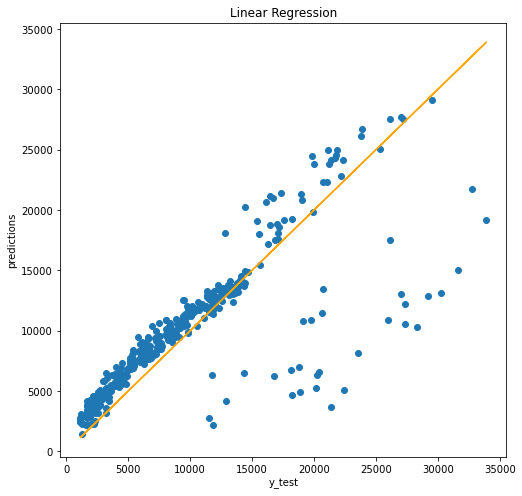

In [37]:
plt.figure(figsize=(8,8))
plt.scatter(x=y_test,y=predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Linear Regression')
plt.plot(y_test,y_test,color='orange')

Here we see a resonable improvement in the results of the model with a reduction by around 1600 in the mean squared error of the model.

From here I believe that with more features columns we could imporve the results further and figure out why there are some significant outliers with expensive medical fees. The current model would also be able to imporve with more features. Additionally, we could look to use another model instead of a standard linear regression model to improve our predictions.

## Deep learning and Neural Networks

In [38]:
X = df_new.drop('charges',axis=1).values
y = df_new['charges'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scalar = MinMaxScaler()

In [41]:
X_train = scalar.fit_transform(X_train)

In [42]:
X_test = scalar.transform(X_test)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [44]:
X_train.shape

(839, 8)

In [45]:
model = Sequential()

model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mae')

In [46]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400)

Epoch 1/400
7/7 [==============================] - 1s 24ms/step - loss: 10042.5342 - val_loss: 9660.4346
Epoch 2/400
7/7 [==============================] - 0s 5ms/step - loss: 10042.4922 - val_loss: 9660.3975
Epoch 3/400
7/7 [==============================] - 0s 6ms/step - loss: 10042.4541 - val_loss: 9660.3604
Epoch 4/400
7/7 [==============================] - 0s 6ms/step - loss: 10042.4180 - val_loss: 9660.3232
Epoch 5/400
7/7 [==============================] - 0s 7ms/step - loss: 10042.3818 - val_loss: 9660.2861
Epoch 6/400
7/7 [==============================] - 0s 6ms/step - loss: 10042.3418 - val_loss: 9660.2451
Epoch 7/400
7/7 [==============================] - 0s 7ms/step - loss: 10042.3018 - val_loss: 9660.2021
Epoch 8/400
7/7 [==============================] - 0s 6ms/step - loss: 10042.2559 - val_loss: 9660.1553
Epoch 9/400
7/7 [==============================] - 0s 6ms/step - loss: 10042.2070 - val_loss: 9660.1045
Epoch 10/400
7/7 [==============================] - 0s 5ms/step

7/7 [==============================] - 0s 5ms/step - loss: 7536.2456 - val_loss: 7122.8433
Epoch 80/400
7/7 [==============================] - 0s 5ms/step - loss: 7404.0083 - val_loss: 6992.3516
Epoch 81/400
7/7 [==============================] - 0s 5ms/step - loss: 7267.0010 - val_loss: 6866.0972
Epoch 82/400
7/7 [==============================] - 0s 5ms/step - loss: 7133.5840 - val_loss: 6738.6919
Epoch 83/400
7/7 [==============================] - 0s 5ms/step - loss: 6997.7793 - val_loss: 6609.7290
Epoch 84/400
7/7 [==============================] - 0s 7ms/step - loss: 6861.8647 - val_loss: 6481.6626
Epoch 85/400
7/7 [==============================] - 0s 4ms/step - loss: 6725.4194 - val_loss: 6355.8589
Epoch 86/400
7/7 [==============================] - 0s 5ms/step - loss: 6588.7437 - val_loss: 6236.1479
Epoch 87/400
7/7 [==============================] - 0s 5ms/step - loss: 6455.4375 - val_loss: 6115.9912
Epoch 88/400
7/7 [==============================] - 0s 5ms/step - loss: 6324.

7/7 [==============================] - 0s 5ms/step - loss: 4568.3140 - val_loss: 4353.4033
Epoch 158/400
7/7 [==============================] - 0s 4ms/step - loss: 4559.6729 - val_loss: 4345.1104
Epoch 159/400
7/7 [==============================] - 0s 5ms/step - loss: 4551.7124 - val_loss: 4337.2290
Epoch 160/400
7/7 [==============================] - 0s 8ms/step - loss: 4542.1274 - val_loss: 4328.6646
Epoch 161/400
7/7 [==============================] - 0s 5ms/step - loss: 4533.9858 - val_loss: 4319.6284
Epoch 162/400
7/7 [==============================] - 0s 5ms/step - loss: 4524.9092 - val_loss: 4311.1973
Epoch 163/400
7/7 [==============================] - 0s 4ms/step - loss: 4516.3140 - val_loss: 4302.7261
Epoch 164/400
7/7 [==============================] - 0s 4ms/step - loss: 4507.5000 - val_loss: 4293.5630
Epoch 165/400
7/7 [==============================] - 0s 4ms/step - loss: 4498.1362 - val_loss: 4284.9800
Epoch 166/400
7/7 [==============================] - 0s 5ms/step - lo

7/7 [==============================] - 0s 4ms/step - loss: 3572.9585 - val_loss: 3369.8242
Epoch 236/400
7/7 [==============================] - 0s 5ms/step - loss: 3552.6523 - val_loss: 3348.9702
Epoch 237/400
7/7 [==============================] - 0s 4ms/step - loss: 3531.6326 - val_loss: 3328.1611
Epoch 238/400
7/7 [==============================] - 0s 5ms/step - loss: 3510.3667 - val_loss: 3307.0920
Epoch 239/400
7/7 [==============================] - 0s 4ms/step - loss: 3488.9336 - val_loss: 3285.2075
Epoch 240/400
7/7 [==============================] - 0s 5ms/step - loss: 3467.3779 - val_loss: 3262.5730
Epoch 241/400
7/7 [==============================] - 0s 5ms/step - loss: 3444.7566 - val_loss: 3239.9094
Epoch 242/400
7/7 [==============================] - 0s 4ms/step - loss: 3422.1821 - val_loss: 3217.3257
Epoch 243/400
7/7 [==============================] - 0s 4ms/step - loss: 3399.6152 - val_loss: 3193.4111
Epoch 244/400
7/7 [==============================] - 0s 4ms/step - lo

7/7 [==============================] - 0s 4ms/step - loss: 1911.8596 - val_loss: 1704.8517
Epoch 314/400
7/7 [==============================] - 0s 5ms/step - loss: 1911.0016 - val_loss: 1701.7559
Epoch 315/400
7/7 [==============================] - 0s 4ms/step - loss: 1909.1522 - val_loss: 1701.0214
Epoch 316/400
7/7 [==============================] - 0s 4ms/step - loss: 1908.0619 - val_loss: 1699.8977
Epoch 317/400
7/7 [==============================] - 0s 4ms/step - loss: 1906.9099 - val_loss: 1698.1953
Epoch 318/400
7/7 [==============================] - 0s 5ms/step - loss: 1906.0085 - val_loss: 1696.1786
Epoch 319/400
7/7 [==============================] - 0s 5ms/step - loss: 1904.9781 - val_loss: 1696.0513
Epoch 320/400
7/7 [==============================] - 0s 4ms/step - loss: 1903.9749 - val_loss: 1694.7532
Epoch 321/400
7/7 [==============================] - 0s 4ms/step - loss: 1902.9984 - val_loss: 1692.8903
Epoch 322/400
7/7 [==============================] - 0s 4ms/step - lo

7/7 [==============================] - 0s 4ms/step - loss: 1859.4204 - val_loss: 1651.0995
Epoch 392/400
7/7 [==============================] - 0s 4ms/step - loss: 1858.8414 - val_loss: 1650.7717
Epoch 393/400
7/7 [==============================] - 0s 5ms/step - loss: 1858.0154 - val_loss: 1649.3524
Epoch 394/400
7/7 [==============================] - 0s 4ms/step - loss: 1857.2163 - val_loss: 1648.7141
Epoch 395/400
7/7 [==============================] - 0s 4ms/step - loss: 1856.7515 - val_loss: 1648.0889
Epoch 396/400
7/7 [==============================] - 0s 4ms/step - loss: 1856.2695 - val_loss: 1647.8749
Epoch 397/400
7/7 [==============================] - 0s 5ms/step - loss: 1855.3978 - val_loss: 1647.5392
Epoch 398/400
7/7 [==============================] - 0s 4ms/step - loss: 1854.5876 - val_loss: 1646.5435
Epoch 399/400
7/7 [==============================] - 0s 4ms/step - loss: 1853.7484 - val_loss: 1645.2947
Epoch 400/400
7/7 [==============================] - 0s 4ms/step - lo

In [47]:
losses = pd.DataFrame(data=model.history.history)

<AxesSubplot:>

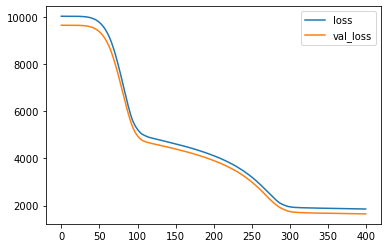

In [48]:
losses.plot(kind='line')

In [49]:
predictions = model.predict(X_test)

12/12 [==============================] - 0s 811us/step


In [50]:
print('Mean absolute error:')
print(mean_absolute_error(y_test,predictions))
print('Mean squared error:' )
print(mean_squared_error(y_test,predictions))
print('Square root of Mean squared error:' )
print(np.sqrt(mean_squared_error(y_test,predictions)))

Mean absolute error:
1644.965733461263
Mean squared error:
18716730.286055405
Square root of Mean squared error:
4326.283657604457


In [51]:
explained_variance_score(y_test,predictions)

0.6330433026392557

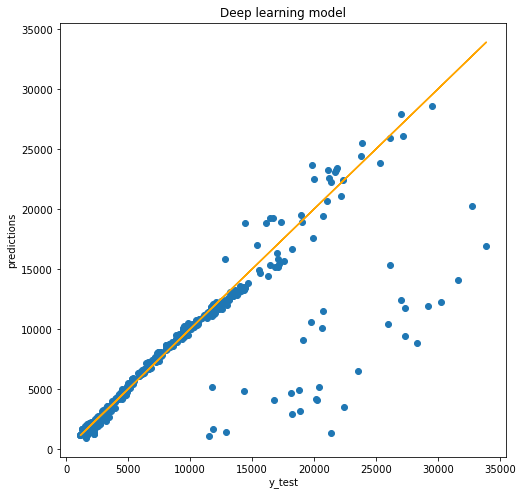

In [52]:
plt.figure(figsize=(8,8))
plt.scatter(x=y_test,y=predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.title('Deep learning model')
plt.plot(y_test,y_test,color='orange')